In [2]:
#Import required libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the datasets
a = pd.read_csv("target_values.csv")
b = pd.read_csv("input_features.csv")

In [4]:
#Shape of the datasets 

print('Shape of dataset a', a.shape)
print('Shape of dataset b', b.shape)

Shape of dataset a (260601, 2)
Shape of dataset b (260601, 39)


In [5]:
#Merging the datasets a and b

data = pd.merge(a,b)

In [6]:
#Shape of dataset
data.shape

(260601, 40)

In [7]:
#First 8 rows of the dataset
data.head(8)

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0
5,333020,2,8,558,6089,2,10,9,5,t,...,1,0,0,0,0,0,0,0,0,0
6,728451,3,9,475,12066,2,25,3,4,n,...,0,0,0,0,0,0,0,0,0,0
7,475515,1,20,323,12236,2,0,8,6,t,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Last 8 rows of the dataset
data.tail(8)

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
260593,226421,2,8,767,8613,2,5,13,5,t,...,1,0,0,0,0,0,0,0,0,0
260594,159555,2,27,181,1537,6,0,13,12,t,...,0,0,0,0,0,0,0,0,0,0
260595,827012,3,8,268,4718,2,20,8,5,t,...,0,0,0,0,0,0,0,0,0,0
260596,688636,2,25,1335,1621,1,55,6,3,n,...,0,0,0,0,0,0,0,0,0,0
260597,669485,3,17,715,2060,2,0,6,5,t,...,0,0,0,0,0,0,0,0,0,0
260598,602512,3,17,51,8163,3,55,6,7,t,...,0,0,0,0,0,0,0,0,0,0
260599,151409,2,26,39,1851,2,10,14,6,t,...,0,0,0,0,0,0,0,0,0,0
260600,747594,3,21,9,9101,3,10,7,6,n,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
damage_grade                              260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-

# EXPLORATORY DATA ANALYSIS

Our goal in this stage is to explore the dataset and gain insights about features that will have a significant impact on the model we build.
The steps are as follows:
    1. Check for missing values.
    2. Determine the data type of each variable.
    3. Observe the distribution of Data.
    4. Identify and deal with outliers.
    5. Draw relavant conclusions.

# Missing Values

In [10]:
#Checking for null values
data.isnull().sum()

building_id                               0
damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber       

The dataset appears to be clean with no missing data.

In [11]:
#Remove duplicates
data.drop_duplicates()

,building_id,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,3,6,487,12198,2,30,6,5,t,...,0,0,0,0,0,0,0,0,0,0
1,28830,2,8,900,2812,2,10,8,7,o,...,0,0,0,0,0,0,0,0,0,0
2,94947,3,21,363,8973,2,10,5,5,t,...,0,0,0,0,0,0,0,0,0,0
3,590882,2,22,418,10694,2,10,6,5,t,...,0,0,0,0,0,0,0,0,0,0
4,201944,3,11,131,1488,3,30,8,9,t,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,2,25,1335,1621,1,55,6,3,n,...,0,0,0,0,0,0,0,0,0,0
260597,669485,3,17,715,2060,2,0,6,5,t,...,0,0,0,0,0,0,0,0,0,0
260598,602512,3,17,51,8163,3,55,6,7,t,...,0,0,0,0,0,0,0,0,0,0
260599,151409,2,26,39,1851,2,10,14,6,t,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print('Shape of data after removing duplicates', data.shape)

Shape of data after removing duplicates (260601, 40)


The data does not contain any duplicate values

# Data Types

In [13]:
data.dtypes

building_id                                int64
damage_grade                               int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_m

# Descriptive Statistics

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
building_id,260601.0,525675.482773,304544.999032,4.0,261190.0,525757.0,789762.0,1052934.0
damage_grade,260601.0,2.238272,0.611814,1.0,2.0,2.0,3.0,3.0
geo_level_1_id,260601.0,13.900353,8.033617,0.0,7.0,12.0,21.0,30.0
geo_level_2_id,260601.0,701.074685,412.710734,0.0,350.0,702.0,1050.0,1427.0
geo_level_3_id,260601.0,6257.876148,3646.369645,0.0,3073.0,6270.0,9412.0,12567.0
count_floors_pre_eq,260601.0,2.129723,0.727665,1.0,2.0,2.0,2.0,9.0
age,260601.0,26.535029,73.565937,0.0,10.0,15.0,30.0,995.0
area_percentage,260601.0,8.018051,4.392231,1.0,5.0,7.0,9.0,100.0
height_percentage,260601.0,5.434365,1.918418,2.0,4.0,5.0,6.0,32.0
has_superstructure_adobe_mud,260601.0,0.088645,0.284231,0.0,0.0,0.0,0.0,1.0


# frequency histograms

Histograms are used to visualize frequency distributions by dividing datasets into small equal segments called bins.

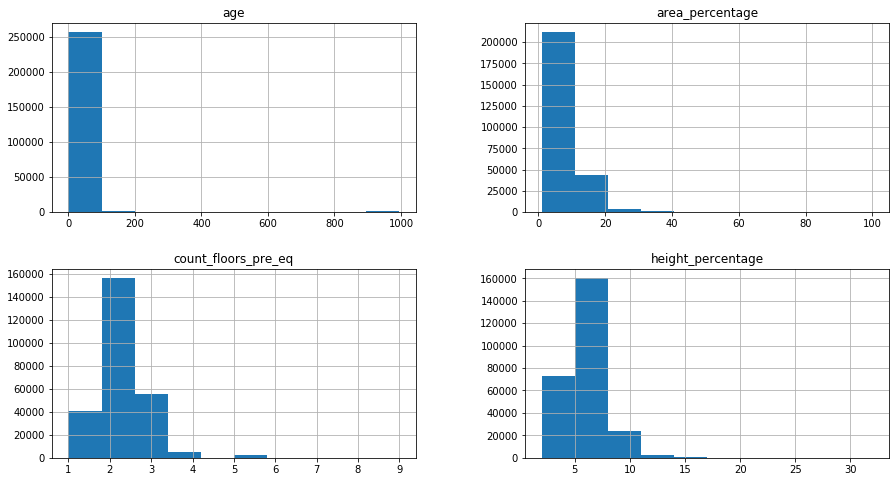

In [15]:
cont_cols = data[['count_floors_pre_eq','age','area_percentage','height_percentage']]
cont_cols.hist(figsize=(15,8))
plt.show()

In [16]:
#nunique() represents unique values
data.nunique()

building_id                               260601
damage_grade                                   3
geo_level_1_id                                31
geo_level_2_id                              1414
geo_level_3_id                             11595
count_floors_pre_eq                            9
age                                           42
area_percentage                               84
height_percentage                             27
land_surface_condition                         3
foundation_type                                5
roof_type                                      3
ground_floor_type                              5
other_floor_type                               4
position                                       4
plan_configuration                            10
has_superstructure_adobe_mud                   2
has_superstructure_mud_mortar_stone            2
has_superstructure_stone_flag                  2
has_superstructure_cement_mortar_stone         2
has_superstructure_m

# Data Distribution

Examining how balanced the datasets are

(array([  2.,   1.,   0.,   1.,   0.,   0.,   1.,   0.,   4.,   4.,   3.,
          4.,   9.,   7.,  13.,   9.,  19.,  29.,  19.,  38.,  56.,  22.,
         72.,  43., 103., 138.,  91., 168., 101., 239., 285., 144., 337.,
        439., 208., 478., 229., 539., 606., 316., 649., 703., 378., 761.,
        407., 781., 828., 416., 804., 382., 811., 792., 394., 784., 704.,
        381., 630., 325., 565., 512., 254., 464., 417., 191., 331., 134.,
        282., 225.,  90., 151., 146.,  52.,  96.,  39.,  82.,  58.,  20.,
         53.,   8.,  32.,  23.,   7.,  19.,   8.,   4.,  12.,   1.,   4.,
          4.,   1.,   5.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([2.16   , 2.16162, 2.16324, 2.16486, 2.16648, 2.1681 , 2.16972,
        2.17134, 2.17296, 2.17458, 2.1762 , 2.17782, 2.17944, 2.18106,
        2.18268, 2.1843 , 2.18592, 2.18754, 2.18916, 2.19078, 2.1924 ,
        2.19402, 2.19564, 2.19726, 2.19888, 2.2005 , 2.20212, 2.20374,
        2.20536, 2.20698, 2.2086 ,

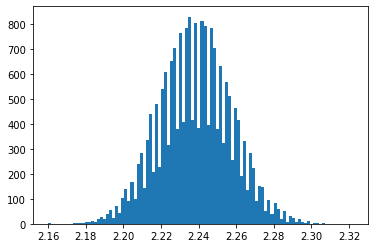

In [17]:
sample_means=[]   #empty list
for i in range(20000): 
    sample_means.append(data['damage_grade'].sample(n=1000).mean())
sample_means

plt.hist(sample_means, bins=100)

# Damage Grade Distribution

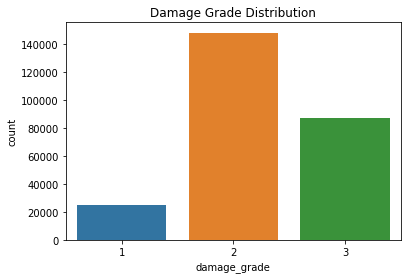

In [18]:
sns.countplot(x='damage_grade', data = data)
plt.title("Damage Grade Distribution")
plt.show()

Based on the results above, the dataset is very imbalanced. This could possibly be caused by the fact that the building's degree of damage is highly correlated with its intensity.
 
1 - represents low damage

2 - reresents a medium level damage

3 - represents a high damage


We will change the datatype of the target variable from ordinal to object since the target variable came as an ordinal feature

In [19]:
data['damage_grade'] = data['damage_grade'].astype('object')

In [20]:
data.dtypes.value_counts()

int64     31
object     9
dtype: int64

# Correlation Analysis

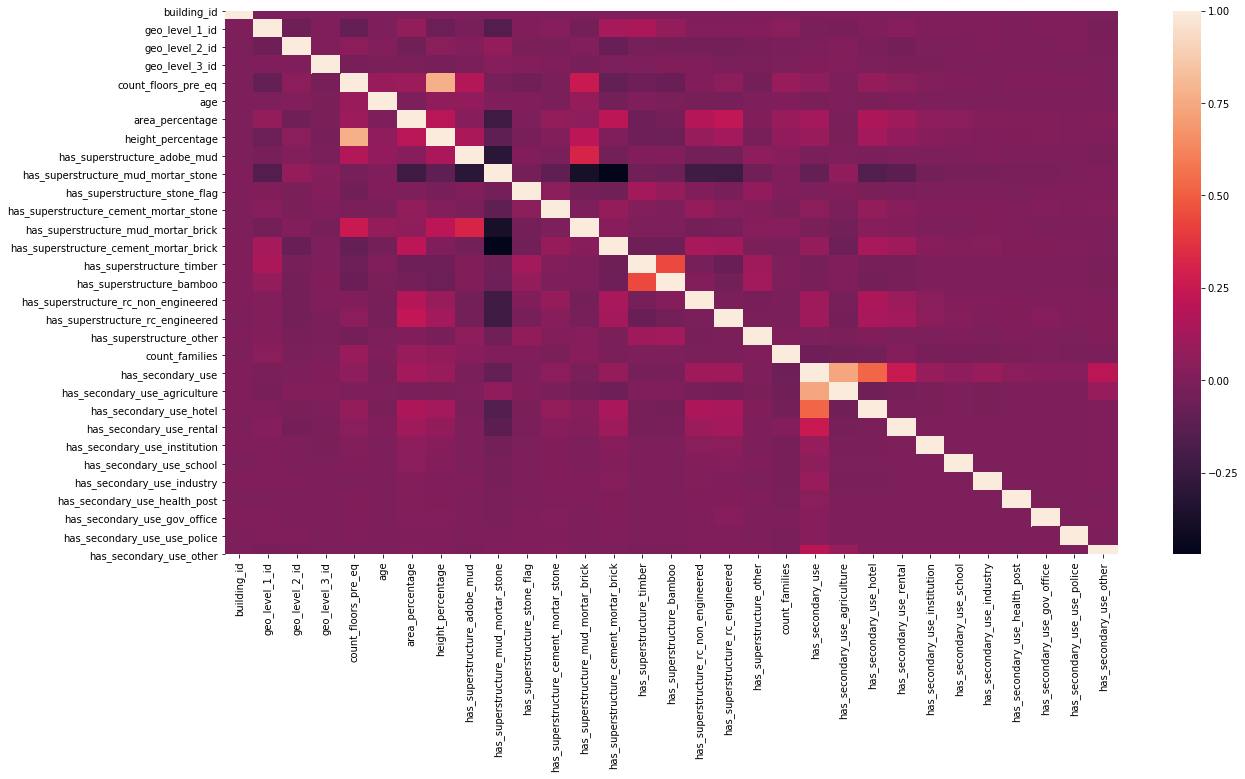

In [21]:
correlation = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation)

In [22]:
There are not many fields that correlate with each other.

has_secondary_use is correlated with it's sub_parts and height_percentage is highly correlated with count_floors_pre_eq

area_percentage and height_percentage are correlated with has_super_structure features and secondary use of buildings

SyntaxError: invalid syntax (<ipython-input-22-be749ff52653>, line 1)

# Trends in data using appropriate visualization tools
1.To determine if the building's age affects its stability in the event of an earthquake.

2.To determine if the building's area affects the amount of damage it will cause.

3.To determine if a building's height can have a significant impact on the damage incurred by an earthquake.

4.To determine if the number of floors in a building affect the amount of damage caused.

5.To determine the families affected by earthquake.

# 1. Age of Building Vs Damage Grade

In [ ]:
plt.figure(figsize=(15,8))
data['age'].value_counts().sort_index().plot.bar()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Age vs Damage level")
plt.show()

In [ ]:
#Analyzing the effect of age on the damage caused to the buildings
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('Damage distribution of buildings under 50 years old')
age = data[data['age']<=50]  
sns.countplot(x='age',data = age, hue= 'damage_grade')
plt.legend(loc='best')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('Damage distribution among buildings between 51 and 100 years old ')
age = data.loc[(data['age']>50) & (data['age']<=100)]
sns.countplot(x= 'age', data = age, hue='damage_grade')
plt.legend(loc='best')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('Damage distribution of buildings between 101 and 150 years old')
age = data.loc[(data['age'] >100) & (data['age']<=150)]
sns.countplot(x ='age', data=age, hue='damage_grade')
plt.legend(loc='best')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.title('Damage distribution of buildings greater than 150 years old')
age = data[data['age']>150]
sns.countplot(x ='age',data= age, hue='damage_grade')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Buildings which are older than 100 years contains outliers. Remove them.

outlier_data = data['age']<100  
data = data[outlier_data]

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['age'], hue=data['damage_grade'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title('Age of Buildings')
plt.legend(['Low damage', 'Average damage', 'High damage'], loc='upper right')
plt.show()

OBSERVATIONS

Observations from the above figures indicate that buildings under 50 years of age have a dominating damage grade of medium, with noticeable increase in damage from 0 to 20 years of age and a gradual decline from 25 years of age to 45 years.In addition, the buildings with 100 and 150 years also have a medium damage severity grade, indicating that age plays a major role in determining the degree of damage to the building.

# 2. Area of Building Vs Damage Grade

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='area_percentage', hue=data['damage_grade'], data= data[data['area_percentage']<40])
plt.legend(loc ='upper right')
plt.xlabel("Area Percentage")
plt.ylabel("Count")
plt.title('Area of Buildings')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.FacetGrid(data, hue='damage_grade', height=6, aspect=2).map(sns.distplot,'area_percentage').add_legend()
plt.title("Area Percentage of Buildings")
plt.show()

In [ ]:
sns.set_style('whitegrid')
sns.boxplot('damage_grade','area_percentage', data=data)
plt.xlabel('Area Percentage')
plt.ylabel('Count')
plt.title('Distribution of Damage grade per Area Percentage')
plt.show()

As seen from the observation, the area of the building contributes to the damage caused to it.
The normalized footprint area for most of the buildings is less than 20%. However, there can be outliers, and this must be addressed.

# 3. Height of Buildings Vs Damage Grade

In [ ]:
a = data.groupby(['height_percentage','damage_grade']).size().reset_index()
b = a.pivot(index='height_percentage',columns='damage_grade',values=0).reset_index()
b.set_index('height_percentage', inplace=True)

In [ ]:
b.plot(kind='bar', stacked=True, title='Damage type by height percentage of buildings');
plt.ylabel("Count")
plt.show()

In [ ]:
fig,ax= plt.subplots(figsize=(10,6), sharey=True)  #sharey controls sharing of properties among y axes
sns.stripplot(data=data,x='damage_grade',y='height_percentage',hue='damage_grade', jitter=True, ax =ax)
ax.set_title('Height Percentage')
plt.show()

We can see from the above plots that damage increases with height. This is another variable with outliers.
Most of the buildings with this feature have values less than 10%, but there are some with values up to 32%.

# 4. Number of Floors Vs Damage Grade

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x= data['count_floors_pre_eq'], hue =data['damage_grade'])
plt.legend(loc='upper right')
plt.xlabel('Floors')
plt.ylabel('Count')
plt.title('Number of Floors Before Earthquake')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
sns.FacetGrid(data, hue='damage_grade', height=5).map(sns.distplot,'count_floors_pre_eq').add_legend()
plt.show()

 Observations

There are significant damage grades for buildings with two floors, followed by buildings with three floors and a floor. Buildings with
two floors have a medium damage grade and then a high damage grade, which also reflects in buildings with three floors and a floor.

# 5. Number of families Vs Damage Grade

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x= data['count_families'], hue =data['damage_grade'])
plt.xlabel('Number of Families')
plt.ylabel('Count')
plt.title('Count of Families')
plt.legend(loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
ax = data.groupby('damage_grade')['count_families'].sum().sort_values().plot.bar(color=['skyblue','turquoise','aquamarine'])
total_values = [] #create a list to collect the patches data. Patches is 

for i in ax.patches:
    total_values.append(i.get_height())  # get_height is used to get the figure height
    
#Create individual bar labels using total_values list
total = sum(total_values)
for i in ax.patches:
    ax.text(i.get_x()+.12, i.get_height()+5, str(round((i.get_height()/total)*100, 2)) + '%', fontsize=13) #get_height returns the figure height as a float
    
plt.title('Families affected due to Earthquake')
plt.xlabel('Damage Grade')
plt.ylabel('Count')
plt.show()

Observations

Families affected due to earthquake

The majority of the buildings only contained one family.

1. It is estimated that 34.25% of the families lived in houses prone to high damage, making them the most exposed group in terms of Health and Financial Damages.


2. Although most families lived in decent houses, 56.78% of them were impacted.


3. 8.97% of the families lived in well built houses that could withstand the earthquake.

# Analysing Categorical Features

In [ ]:
cat_cols = data.select_dtypes(include="object")
font={'weight' : 'bold',
        'size': 7}       
q=1
plt.figure(figsize=(15,10))
for i in cat_cols:
    plt.subplot(3,3,q)
    ax=sns.countplot(data[i].dropna(),palette="Paired",hue=data["damage_grade"])
    plt.xticks(**font)
    plt.yticks(**font)
    plt.xlabel(i)
    plt.legend(["Low damage","Avg damage","High damage"])
    q+=1
plt.show()

Observations

1. Land surface conditions have a significant impact on the severity of damage to the building, based on type T.
2. According to the foundation type, we can observe that the value of 'r' for the floor type has an impact on the amount of damage to the building.
3. Futhermore, type F of ground floor affects the level of damage to a structure in a significant manner.

As we can see, these findings are largely observational and have a significant impact on the model.

# Geopraphic levels

In [ ]:
fig,axes = plt.subplots(ncols=3, figsize =(20,5))
sns.distplot(data['geo_level_1_id'], ax=axes[0])
sns.distplot(data['geo_level_2_id'], rug=True, ax=axes[1])  #rug implies whether to draw a rugplot on the support axis
sns.distplot(data['geo_level_3_id'], rug=True, ax=axes[2])
plt.show()

From the above figure, we can say that geo_level_2 and geo_level_3 has approximately uniform distribution

In [ ]:
data['geo_level_1_id'] = data['geo_level_1_id']/data['geo_level_1_id'].max()
data['geo_level_2_id'] = data['geo_level_2_id']/data['geo_level_2_id'].max()
data['geo_level_3_id'] = data['geo_level_3_id']/data['geo_level_3_id'].max()

In [ ]:
fig,ax = plt.subplots(ncols=3, figsize=(20,5))
sns.boxplot(x=data['damage_grade'], y=data['geo_level_1_id'], ax=ax[0])
sns.boxplot(x=data['damage_grade'], y=data['geo_level_2_id'], ax=ax[1])
sns.boxplot(x=data['damage_grade'], y=data['geo_level_3_id'],ax=ax[2])
plt.show()

From the above,it appears that most of the buildings in geographics region 1 have low damage grade with about 75% residing in geographic levels 9 to 26. Additionally, buildings in geographic level 2 have low damage grades similar to those in geographic level 1, with about 75 percent of the buildings in geographic level 2 located above 200. Lastly, buildings in geographic level 3 have damage grades that are similar to those in all geographic levels. 

Geographic region features (geolevel_1_id, geolevel_2_id, geolevel_3_id) can been classified as categorical since they represent regions in Nepal. Even though these integers are in numerical fromat, they do not exhibit any correlation with the target. In other words, a higher number does not lead to higher or lower damage. 

In [ ]:
#list of structure related columns

cols=['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone',
       'has_superstructure_mud_mortar_brick',       
      'has_superstructure_cement_mortar_brick',   
      'has_superstructure_cement_mortar_stone',
       'has_superstructure_timber',
       'has_superstructure_bamboo',
       'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered',
      'has_superstructure_stone_flag',
       'has_superstructure_other']

# melt the columns
data_melt = data.melt(id_vars=['age','damage_grade'], value_vars = cols).rename(columns={'variable':'structure','value':'count'})
# Group by age, damage and structure
damageByStructure= data_melt.groupby(['damage_grade','structure']).agg({'count':'sum'})
damageByStructure.reset_index(inplace=True)
damageByStructure.sort_values(by='count', ascending=False,inplace=True)
sns.barplot(x='structure',y='count',data=damageByStructure)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

melt function is used to transform a dataframe into a format where one or more columns are identifier variables(id_vars), while the rest are measured variables(value_vars), are unpivoted to row axis, leaving two non-identifier columns, 'variable' and 'value'.

There were 5 types of construction materials that sustained the damage, such as mud_mortar_stone, timber, bamboo, adobe_mud and cement_mortar_brick.
The least affected structures were Stone_flag, cement_mortar_stone, rc_engineered and other structures. 
These factors indicate either these buildings were well designed to withstand earthquakes or they were located far from the epicenter.

In [ ]:
#Correlation heatmap for structure columns
sns.heatmap(data[cols].corr())
plt.show()

As bamboo and timber are positively correlated, one of them can be eliminated. 
In addition, the first four columns are negatively correlated while the first and third columns are positively correlated, so one of them can be dropped.

#  Building Plan Configuration Vs Damage Grade

In [ ]:
x = data.groupby(['plan_configuration','damage_grade']).size().reset_index()
y = x.pivot(index='plan_configuration', columns='damage_grade',values=0).reset_index()
y.set_index('plan_configuration',inplace=True)
y.plot(kind='bar', stacked=True,title='Type of damage by plan configuration of buildings')
plt.ylabel('Count')
plt.show()

Observation

Plans configuration type d has a significant impact on the severity of damaged buildings. The majority of buildings sustained medium damage

# Insights from Data Analysis

1. In order to prevent misguiding the model, building_id needs to be removed. 

2. There are many outliers, so the encoding system should be label encoder or one hot encoder.

3. There are no missing values in the data.

# Drop unnecessary features

In [ ]:
data.drop(columns='building_id', inplace=True)

In [ ]:
print('Shape of the dataset after removing unnecessary features', data.shape)
data.head(2)

# Transforming object variables to int

In [ ]:
#Label Encoding the variables

le = LabelEncoder()
encode = data[['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type','position','plan_configuration','legal_ownership_status']]
for x in encode:
    data[[x]] = le.fit_transform(data[[x]])

In [ ]:
#finding unique values
data['land_surface_condition'].unique()

In [ ]:
data.head()